<a href="https://colab.research.google.com/github/Pierre-Louis245/Emotion-recognition/blob/main/Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()  # Chargez le fichier `kaggle.json` depuis votre ordinateur.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pierrelouis245","key":"592b63632d9e1134089c3ddd34bc16dc"}'}

In [3]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)  # Crée un dossier Kaggle s'il n'existe pas déjà
!mv kaggle.json /root/.kaggle/               # Déplace le fichier dans le dossier Kaggle
os.chmod('/root/.kaggle/kaggle.json', 600)   # Définit les permissions du fichier


In [4]:
!kaggle datasets list


ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset                10KB  2024-10-29 19:32:26           5980        118  1.0              
steve1215rogg/student-lifestyle-dataset                      student lifestyle dataset                           22KB  2024-11-11 19:11:28           2613         43  1.0              
ravindrasinghrana/carbon-co2-emissions                       Carbon (CO2) Emissions                              42KB  2024-10-28 09:11:56           1642         24  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercis

In [5]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 90% 54.0M/60.3M [00:00<00:00, 202MB/s]
100% 60.3M/60.3M [00:00<00:00, 192MB/s]


In [6]:
import zipfile

with zipfile.ZipFile("fer2013.zip", "r") as zip_ref:
    zip_ref.extractall("fer2013")  # Crée un dossier contenant les données


In [8]:
import os
os.listdir("fer2013")


['train', 'test']

In [9]:
import pandas as pd

data = pd.read_csv("fer2013/fer2013.csv")
print(data.head())


FileNotFoundError: [Errno 2] No such file or directory: 'fer2013/fer2013.csv'

In [10]:
import os
print(os.listdir("fer2013"))  # Liste les fichiers dans le dossier "fer2013"



['train', 'test']


In [11]:
print("Contenu du dossier train :", os.listdir("fer2013/train"))
print("Contenu du dossier test :", os.listdir("fer2013/test"))


Contenu du dossier train : ['surprise', 'sad', 'fear', 'neutral', 'angry', 'happy', 'disgust']
Contenu du dossier test : ['surprise', 'sad', 'fear', 'neutral', 'angry', 'happy', 'disgust']


In [12]:
import os
import cv2
import numpy as np

# Mapper les labels
emotion_labels = {"surprise": 0, "sad": 1, "fear": 2, "neutral": 3, "angry": 4, "happy": 5, "disgust": 6}

def load_data(data_dir, labels_map):
    images = []
    labels = []
    for emotion, label in labels_map.items():
        emotion_dir = os.path.join(data_dir, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Charger les données
train_images, train_labels = load_data("fer2013/train", emotion_labels)
test_images, test_labels = load_data("fer2013/test", emotion_labels)

# Normaliser les images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Ajouter une dimension pour les canaux
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)


Train images shape: (28709, 48, 48, 1)
Train labels shape: (28709,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convertir les labels en one-hot encoding
num_classes = len(emotion_labels)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Définir le modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé
model.summary()

# Entraîner le modèle
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20, batch_size=64)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 92s 201ms/step - accuracy: 0.2519 - loss: 1.8078 - val_accuracy: 0.4039 - val_loss: 1.5691
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 148s 215ms/step - accuracy: 0.3835 - loss: 1.5898 - val_accuracy: 0.4539 - val_loss: 1.4392
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 139s 208ms/step - accuracy: 0.4368 - loss: 1.4684 - val_accuracy: 0.4730 - val_loss: 1.3719
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 99s 220ms/step - accuracy: 0.4603 - loss: 1.4100 - val_accuracy: 0.4953 - val_loss: 1.3330
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 132s 199ms/step - accuracy: 0.4745 - loss: 1.3792 - val_accuracy: 0.5053 - val_loss: 1.2962
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 91s 203ms/step - accuracy: 0.4903 - loss: 1.3313 - val_accuracy: 0.5060 - val_loss: 1.2861
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 199ms/step - accuracy: 0.5004 - loss: 1.2978 - val_accuracy: 0.5120 - val_loss: 1.2587
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 198ms/step - accuracy: 0.5125 - los

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.5306 - loss: 1.2396
Test Accuracy: 0.5511284470558167


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(train_images)


In [16]:
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    validation_data=(test_images, test_labels),
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 104s 230ms/step - accuracy: 0.4018 - loss: 1.5717 - val_accuracy: 0.5213 - val_loss: 1.2481
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 232ms/step - accuracy: 0.4138 - loss: 1.5052 - val_accuracy: 0.5410 - val_loss: 1.2110
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 141s 229ms/step - accuracy: 0.4333 - loss: 1.4692 - val_accuracy: 0.5254 - val_loss: 1.2615
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 143s 232ms/step - accuracy: 0.4352 - loss: 1.4572 - val_accuracy: 0.5357 - val_loss: 1.1992
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 228ms/step - accuracy: 0.4421 - loss: 1.4405 - val_accuracy: 0.5446 - val_loss: 1.2021
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 102s 228ms/step - accuracy: 0.4474 - loss: 1.4346 - val_accuracy: 0.5393 - val_loss: 1.2085
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 103s 229ms/step - accuracy: 0.4554 - loss: 1.4184 - val_accuracy: 0.5362 - val_loss: 1.2199
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 102s 227ms/step - accuracy: 0.4564 - loss: 1.40

In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5242 - loss: 1.1929
Test Accuracy: 0.5437448024749756


In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
import collections
print("Train class distribution:", collections.Counter(train_labels.argmax(axis=1)))
print("Test class distribution:", collections.Counter(test_labels.argmax(axis=1)))


Train class distribution: Counter({5: 7215, 3: 4965, 1: 4830, 2: 4097, 4: 3995, 0: 3171, 6: 436})
Test class distribution: Counter({5: 1774, 1: 1247, 3: 1233, 2: 1024, 4: 958, 0: 831, 6: 111})


225/225 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step


<Axes: >

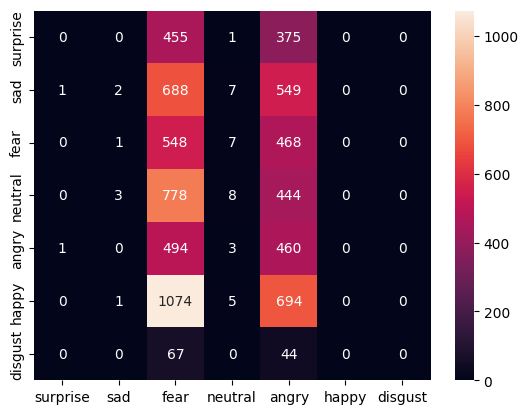

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prédictions
predictions = model.predict(test_images)
y_true = test_labels.argmax(axis=1)
y_pred = predictions.argmax(axis=1)

# Matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=emotion_labels.keys(), yticklabels=emotion_labels.keys())
